# Mission Atlantic - CS SOMAR
## Plotting catch & effort ICCAT T2CE
### author: Henrique Amato Peres - ha.peres@usp.br
#### 11 March 2022

In [1]:
#! -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = np.genfromtxt('10mar22_eff.csv', delimiter=',')
df_eff = np.reshape(df1, (64, 2, 2, 59, 48))
del(df1)
#df2 = np.genfromtxt('10mar22_cap.csv', delimiter=',')
#df_cap = np.reshape(df2, (64, 2, 10, 59, 47))
#del(df2)
df2 = np.genfromtxt('23fev22_eff.csv', delimiter=',')
df_cap = np.reshape(df2, (64, 2, 2, 59, 47))
del(df2)

/tmp/ipykernel_18652/3071860674.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(Lon, Lat1, np.log10(eff_1).T, shading='auto')


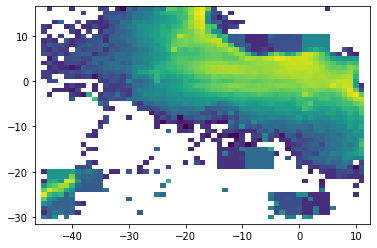

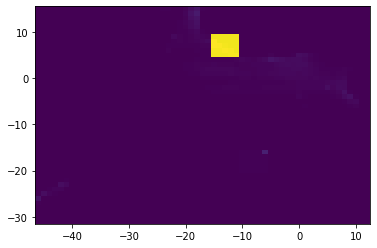

In [3]:
eff_1 = np.nansum(df_eff[:, :, 0, :, :], axis=(0,1))
eff_2 = np.nansum(df_cap[:, :, 0, :, :], axis=(0,1))
Lat1 = np.arange(-31, 17, 1)
Lon = np.arange(-46, 13, 1)
Lat = np.arange(-31, 16, 1)
plt.pcolormesh(Lon, Lat1, np.log10(eff_1).T, shading='auto')
plt.show()
plt.pcolormesh(Lon, Lat, eff_2.T, shading='auto')
plt.show()

In [9]:
### all years summed from 2012
eff_h = np.nansum(df_eff[56:, :, 0, :, :], axis=(0,1))
eff_k = np.nansum(df_eff[56:, :, 1, :, :], axis=(0,1))
cap_Tmh = np.nansum(df_cap[56:, :, 0, :, :], axis=(0,1))
cap_Tmk = np.nansum(df_cap[56:, :, 1, :, :], axis=(0,1))
cap_Tsh = np.nansum(df_cap[56:, :, 2, :, :], axis=(0,1))
cap_Tsk = np.nansum(df_cap[56:, :, 3, :, :], axis=(0,1))
cap_Toh = np.nansum(df_cap[56:, :, 4, :, :], axis=(0,1))
cap_Tok = np.nansum(df_cap[56:, :, 5, :, :], axis=(0,1))
cap_Smh = np.nansum(df_cap[56:, :, 6, :, :], axis=(0,1))
cap_Smk = np.nansum(df_cap[56:, :, 7, :, :], axis=(0,1))
cap_Soh = np.nansum(df_cap[56:, :, 8, :, :], axis=(0,1))
cap_Sok = np.nansum(df_cap[56:, :, 9, :, :], axis=(0,1))

In [3]:
### each year
eff_h = np.nansum(df_eff[:, :, 0, :, :], axis=1)
eff_k = np.nansum(df_eff[:, :, 1, :, :], axis=1)
cap_Tmh = np.nansum(df_cap[:, :, 0, :, :], axis=1)
cap_Tmk = np.nansum(df_cap[:, :, 1, :, :], axis=1)
cap_Tsh = np.nansum(df_cap[:, :, 2, :, :], axis=1)
cap_Tsk = np.nansum(df_cap[:, :, 3, :, :], axis=1)
cap_Toh = np.nansum(df_cap[:, :, 4, :, :], axis=1)
cap_Tok = np.nansum(df_cap[:, :, 5, :, :], axis=1)
cap_Smh = np.nansum(df_cap[:, :, 6, :, :], axis=1)
cap_Smk = np.nansum(df_cap[:, :, 7, :, :], axis=1)
cap_Soh = np.nansum(df_cap[:, :, 8, :, :], axis=1)
cap_Sok = np.nansum(df_cap[:, :, 9, :, :], axis=1)

In [4]:
import cartopy.crs as ccrs
proj = ccrs.PlateCarree()
import cartopy.feature as cfeature
LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='0.7')
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.path as mpath

In [5]:
### Grid 1x1 to plot
Lon = np.arange(-46, 13, 1)
Lat = np.arange(-31, 16, 1)

In [6]:
somar_verts = [(-36,0), (-28,9), (3,-15), (-5,-24)]  # SOMAR polygon
somar_p = mpath.Path(somar_verts)
mask_somar = np.ones((len(Lon), len(Lat)), dtype=bool)

In [7]:
for ilo, lo in enumerate(Lon):
    for ila, la in enumerate(Lat):
        if somar_p.contains_point([lo, la]):
            mask_somar[ilo, ila] = False

/tmp/ipykernel_17870/2497211559.py:30: RuntimeWarning: invalid value encountered in true_divide
  data3 = data1 / data2


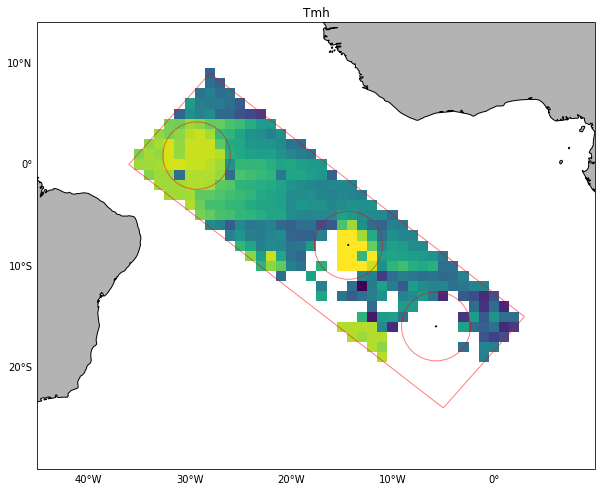

<Figure size 432x288 with 0 Axes>

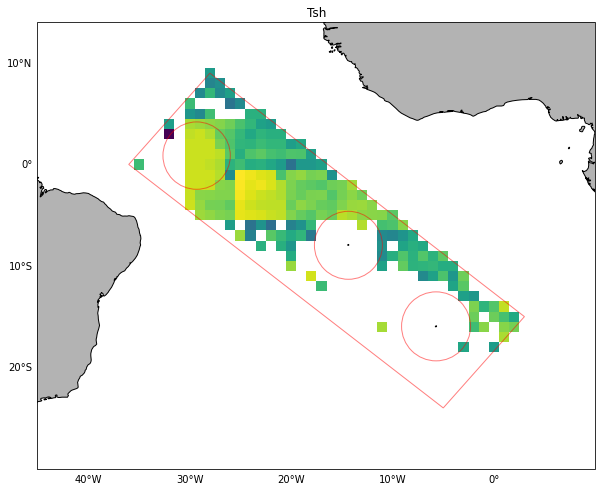

<Figure size 432x288 with 0 Axes>

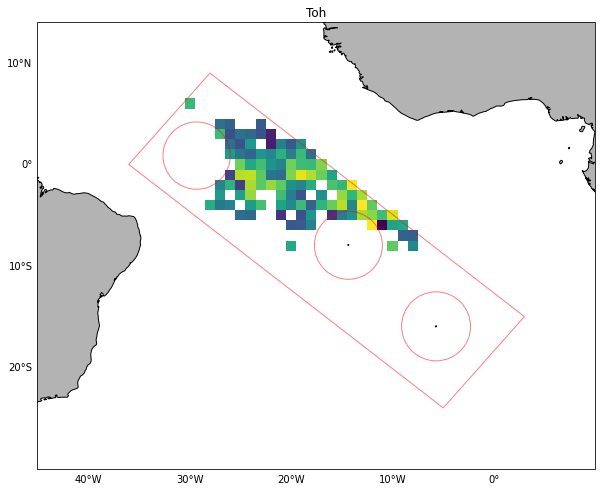

<Figure size 432x288 with 0 Axes>

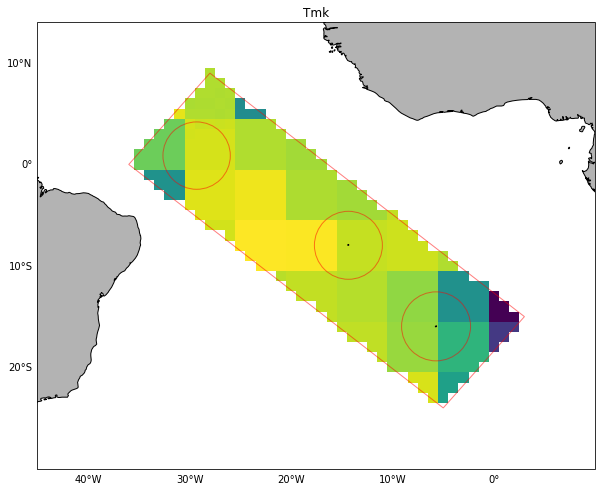

<Figure size 432x288 with 0 Axes>

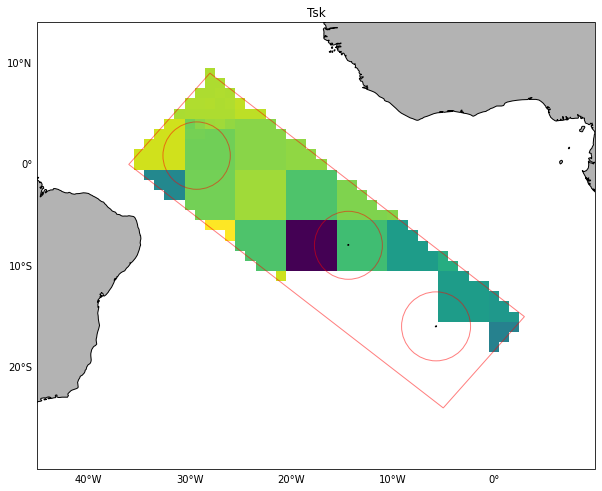

<Figure size 432x288 with 0 Axes>

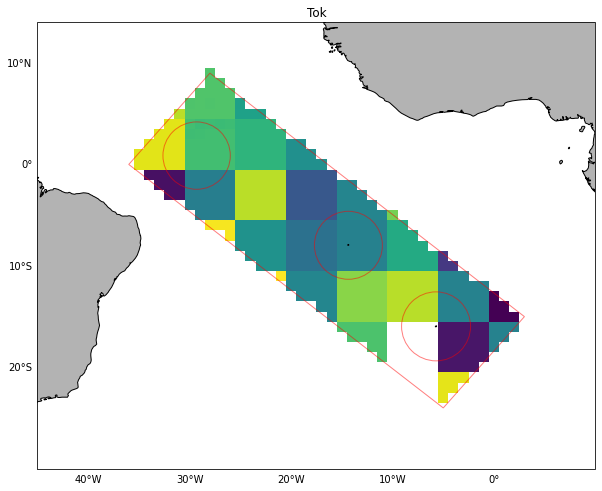

<Figure size 432x288 with 0 Axes>

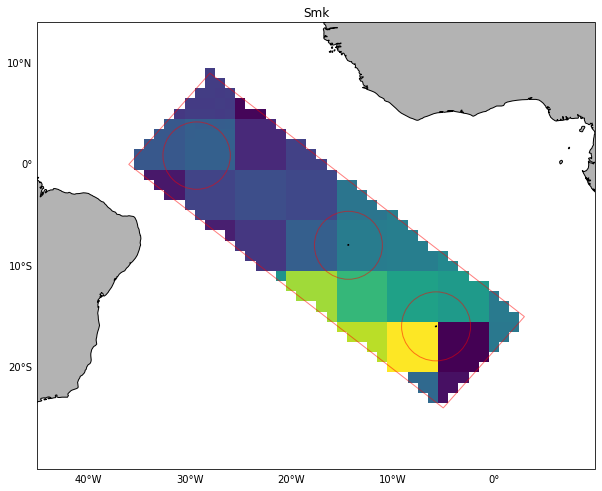

<Figure size 432x288 with 0 Axes>

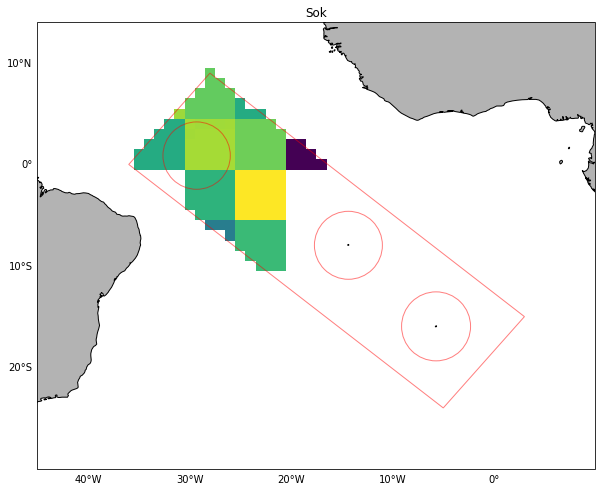

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot all years from 2012
def plota(data, tit):
    fig, ax = plt.subplots(1, 1, figsize=(10,10), subplot_kw=dict(projection=proj))
    gl = ax.gridlines(alpha=0, draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_extent([-45, 10, -30, 14], crs=proj)
    cm = ax.pcolormesh(Lon, Lat, data.T, norm=mcolors.LogNorm())
    ax.add_feature(LAND)
    patch_somar = mpatches.Polygon(somar_verts, ec='r', fc='None', alpha=.5)
    eez_spsp = mpatches.Circle([-29.31, 0.87], radius=3.32, ec='r', fc='None', alpha=.5)
    eez_ai = mpatches.Circle([-14.35, -7.97], radius=3.35, ec='r', fc='None', alpha=.5)
    eez_sh = mpatches.Circle([-5.71, -15.96], radius=3.4, ec='r', fc='None', alpha=.5)
    ax.add_patch(patch_somar)
    ax.add_patch(eez_spsp)
    ax.add_patch(eez_ai)
    ax.add_patch(eez_sh)
    ax.set_title(tit)
    #cb = plt.colorbar(cm, ax=ax, shrink=0.6)
    #cb.set_label('CPUE')
    plt.show()
    plt.clf()
    
    
for spp, eff, tit in [[cap_Tmh, eff_h, 'Tmh'], [cap_Tsh, eff_h, 'Tsh'], [cap_Toh, eff_h, 'Toh'], 
                      [cap_Tmk, eff_k, 'Tmk'], [cap_Tsk, eff_k, 'Tsk'], [cap_Tok, eff_k, 'Tok'], 
                      [cap_Smk, eff_k, 'Smk'], [cap_Sok, eff_k, 'Sok']]:
    data1 = spp
    data2 = eff
    data3 = data1 / data2
    data1[data1==0] = np.nan
    data2[data2==0] = np.nan
    data3[data3==0] = np.nan
    data3[mask_somar] = np.nan
    plota(data3, tit)

/tmp/ipykernel_17870/812578248.py:32: RuntimeWarning: invalid value encountered in true_divide
  data3 = data1 / data2
/home/henrique/.local/lib/python3.8/site-packages/matplotlib/colors.py:1543: RuntimeWarning: invalid value encountered in less_equal
  super().autoscale_None(np.ma.array(A, mask=(A <= 0)))
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

/tmp/ipykernel_17870/812578248.py:32: RuntimeWarning: invalid value encountered in true_divide
  data3 = data1 / data2


<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

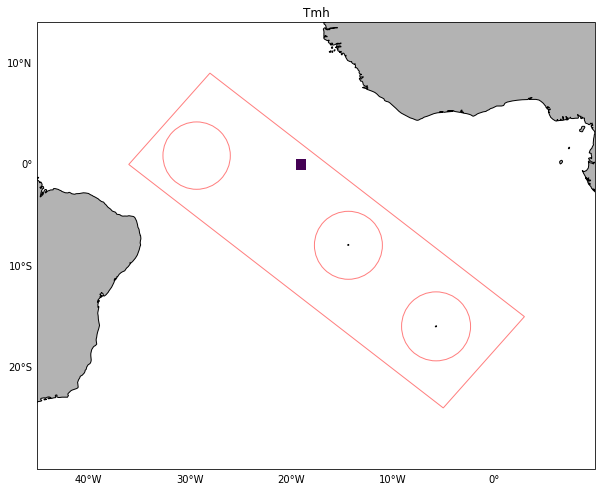

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

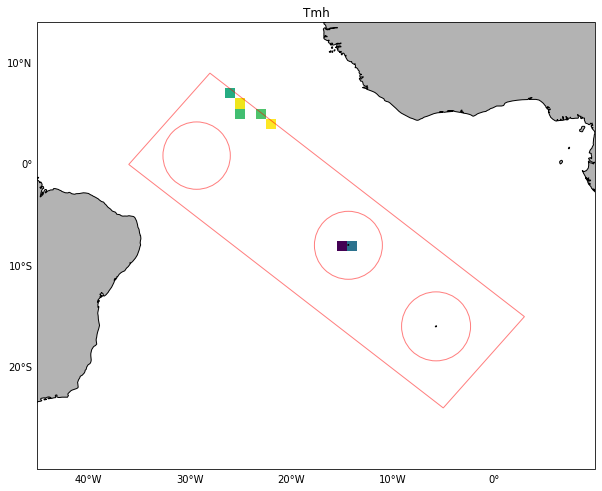

<Figure size 432x288 with 0 Axes>

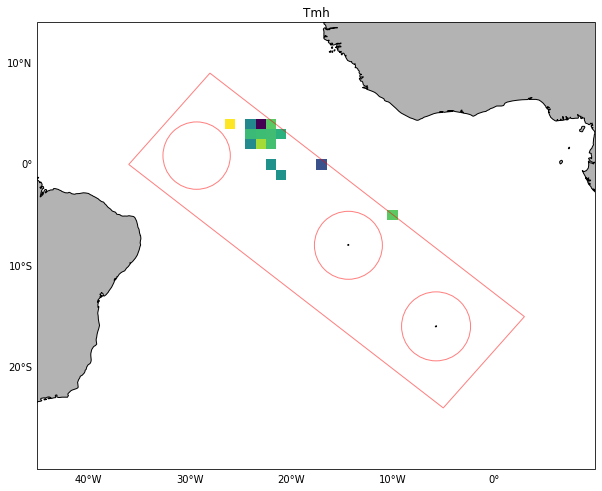

<Figure size 432x288 with 0 Axes>

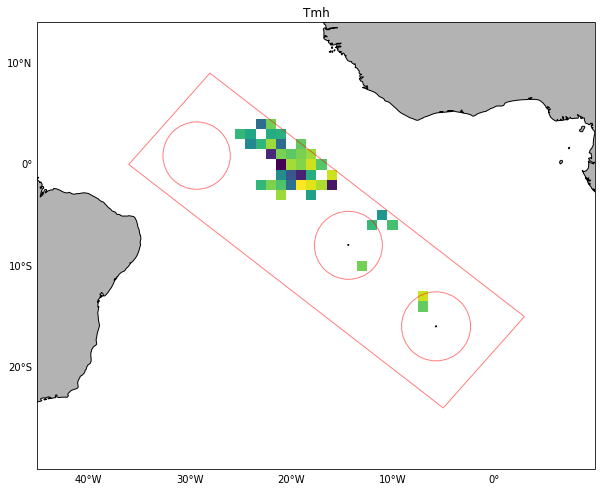

<Figure size 432x288 with 0 Axes>

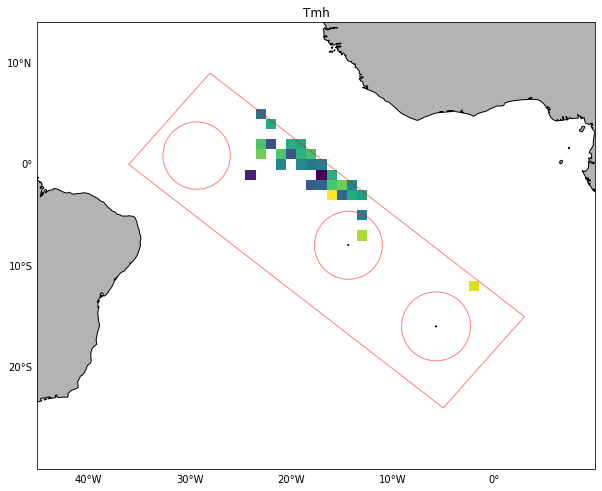

<Figure size 432x288 with 0 Axes>

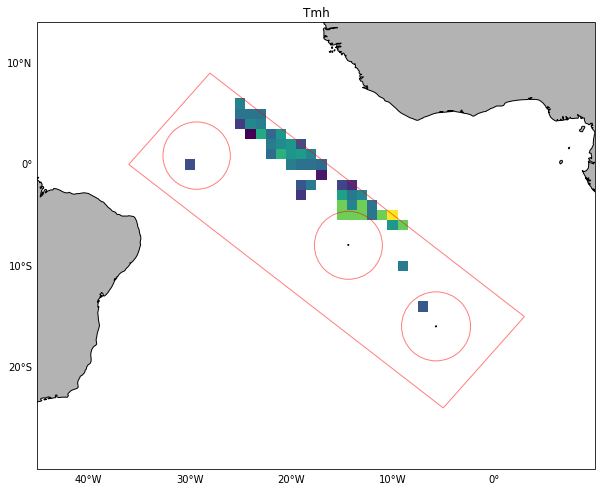

<Figure size 432x288 with 0 Axes>

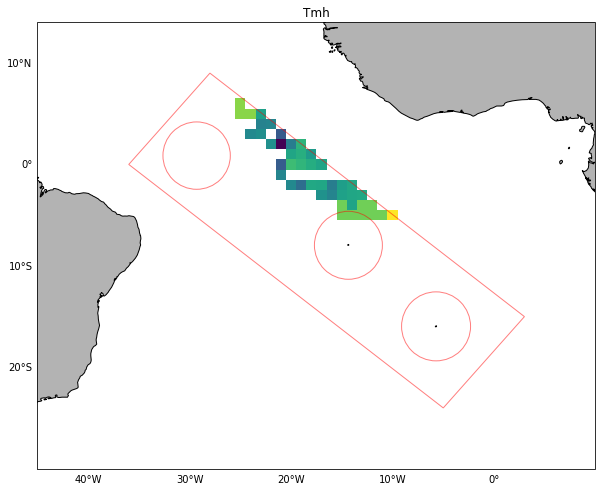

<Figure size 432x288 with 0 Axes>

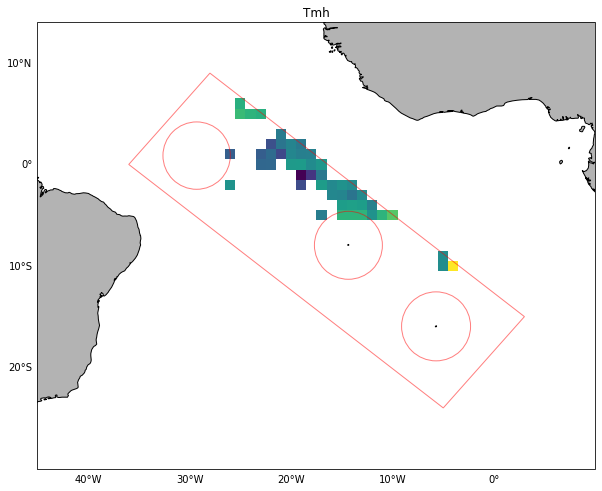

<Figure size 432x288 with 0 Axes>

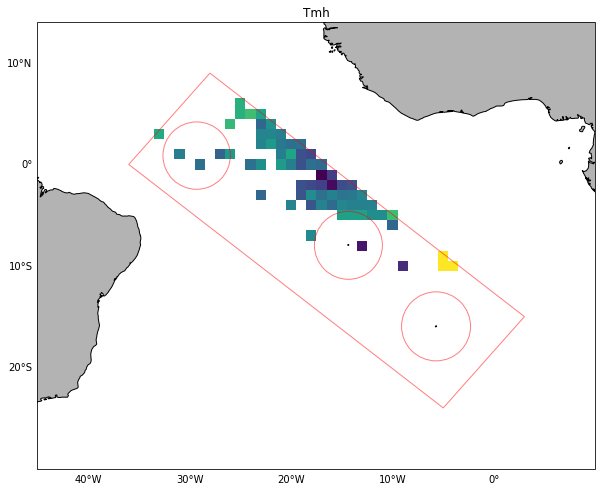

<Figure size 432x288 with 0 Axes>

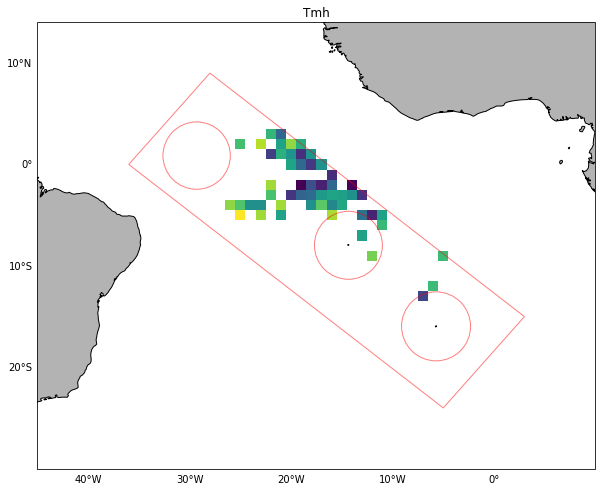

<Figure size 432x288 with 0 Axes>

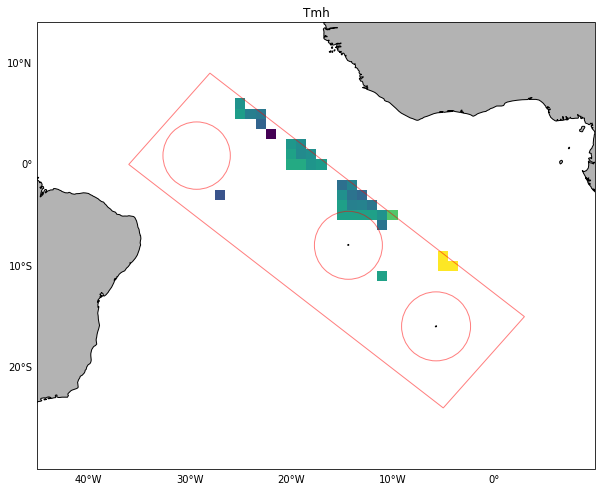

<Figure size 432x288 with 0 Axes>

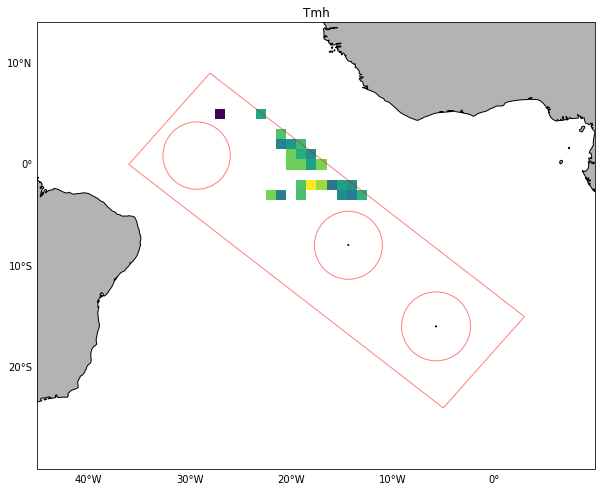

<Figure size 432x288 with 0 Axes>

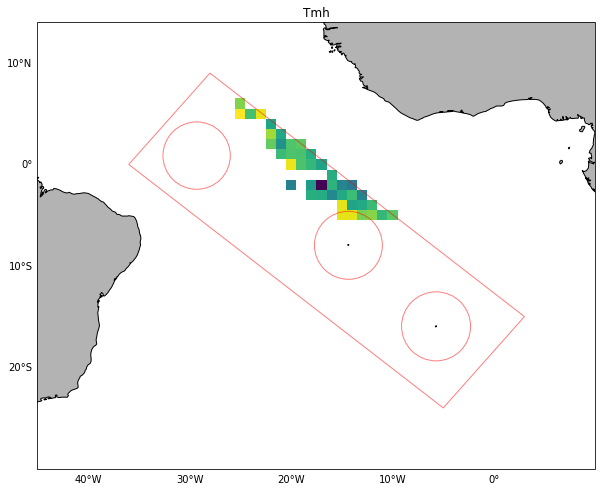

<Figure size 432x288 with 0 Axes>

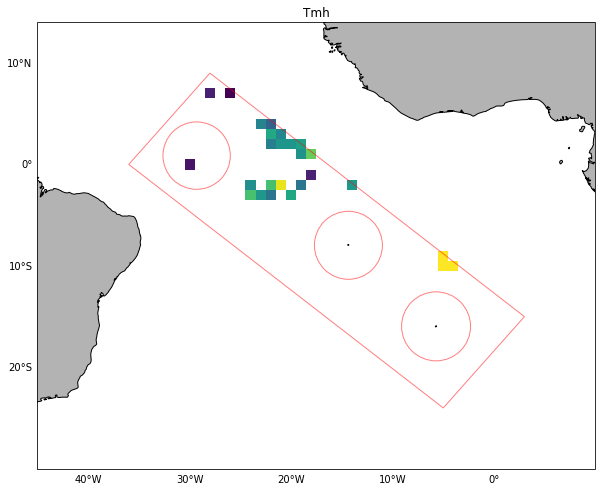

<Figure size 432x288 with 0 Axes>

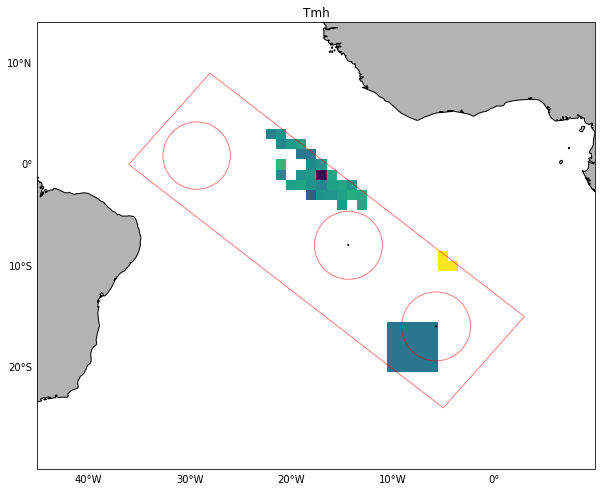

<Figure size 432x288 with 0 Axes>

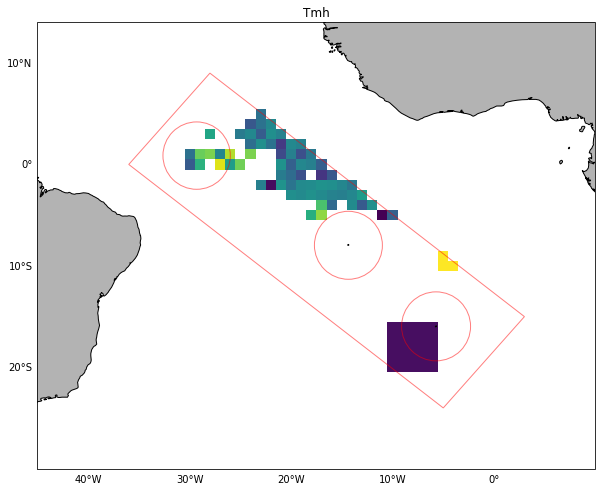

<Figure size 432x288 with 0 Axes>

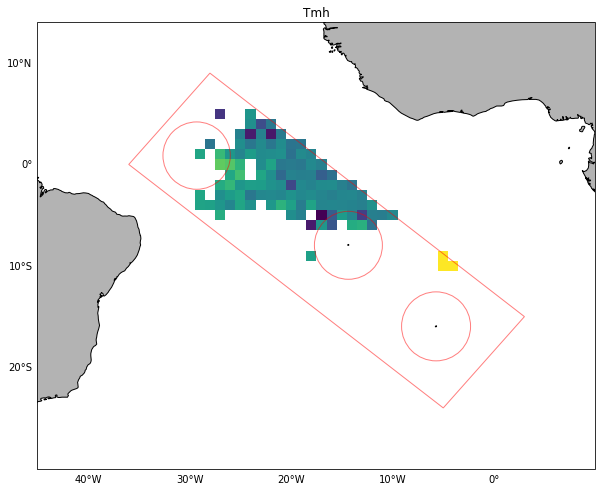

<Figure size 432x288 with 0 Axes>

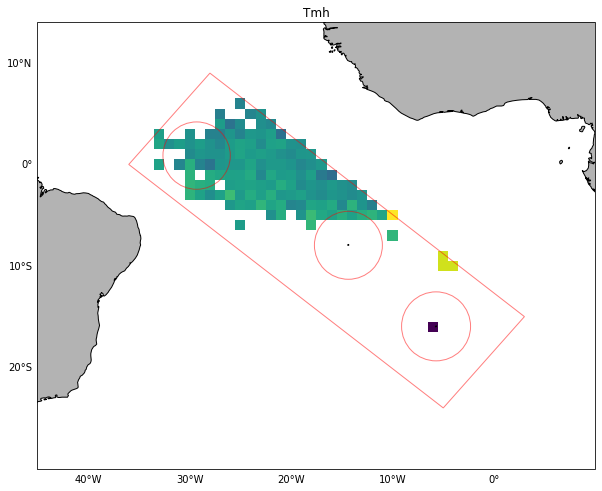

<Figure size 432x288 with 0 Axes>

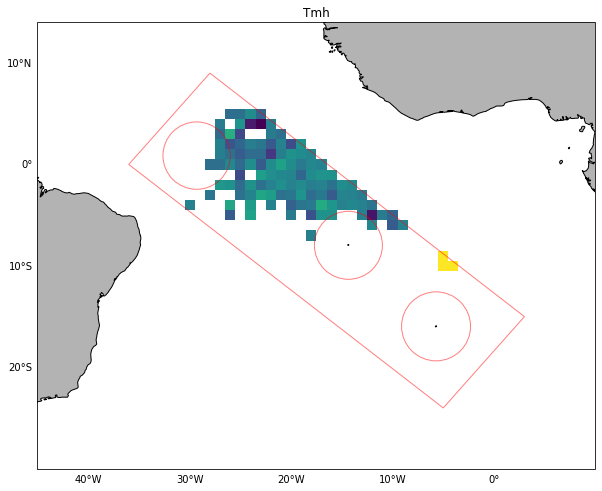

<Figure size 432x288 with 0 Axes>

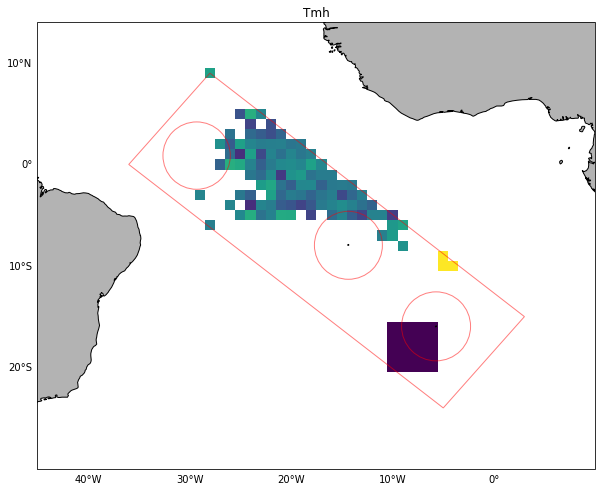

<Figure size 432x288 with 0 Axes>

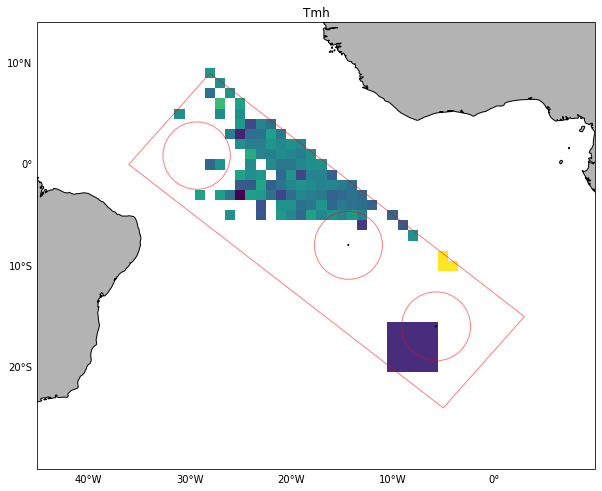

<Figure size 432x288 with 0 Axes>

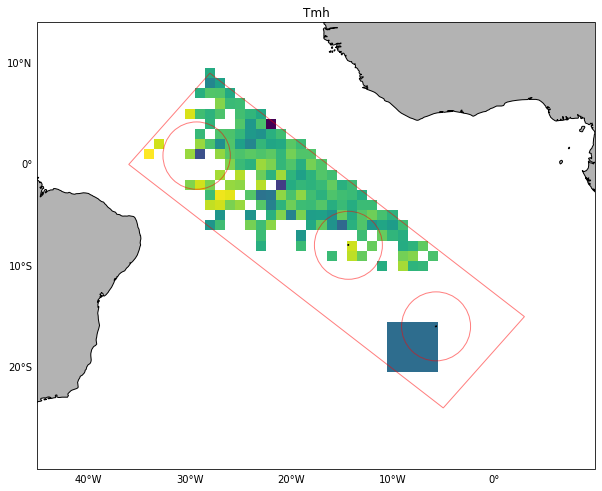

<Figure size 432x288 with 0 Axes>

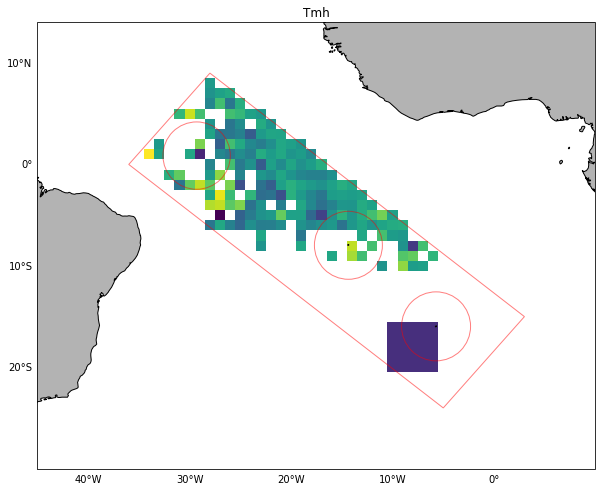

<Figure size 432x288 with 0 Axes>

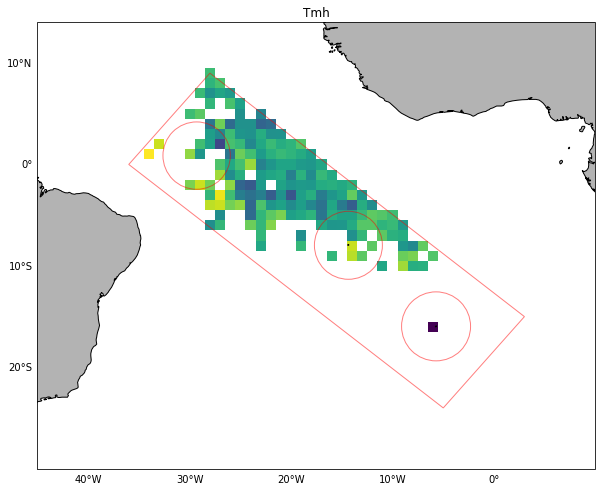

<Figure size 432x288 with 0 Axes>

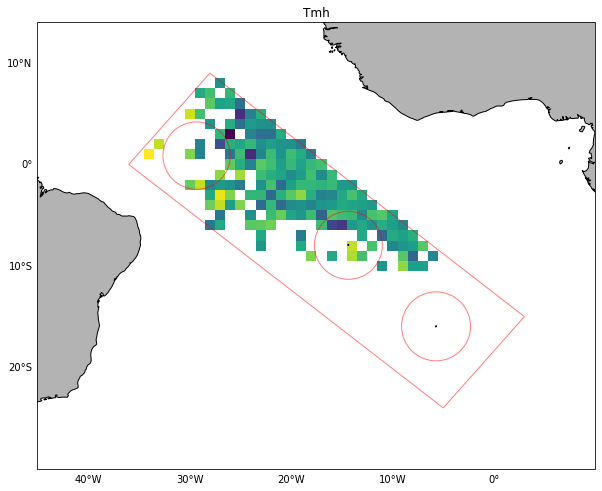

<Figure size 432x288 with 0 Axes>

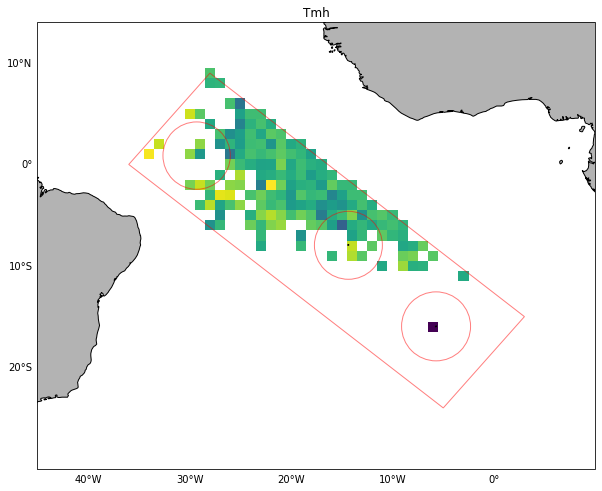

<Figure size 432x288 with 0 Axes>

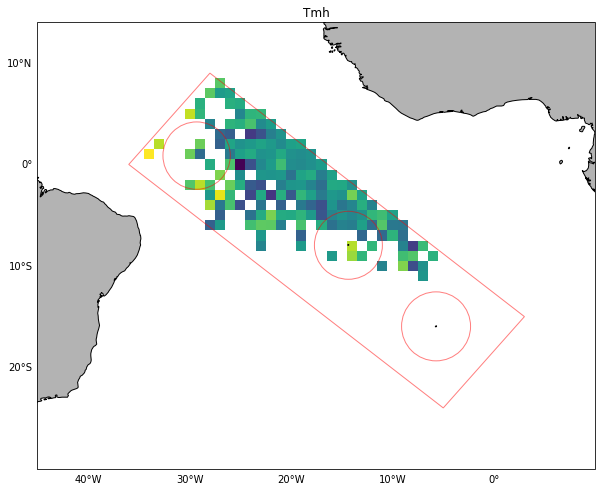

<Figure size 432x288 with 0 Axes>

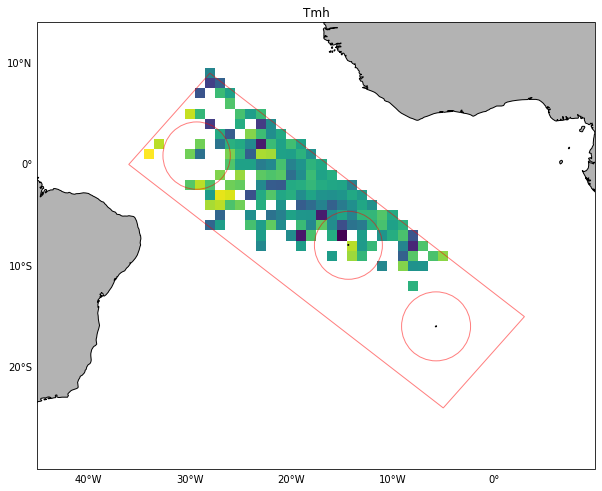

<Figure size 432x288 with 0 Axes>

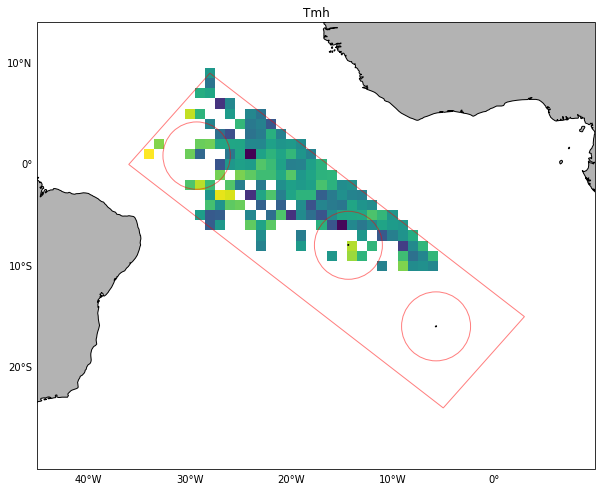

<Figure size 432x288 with 0 Axes>

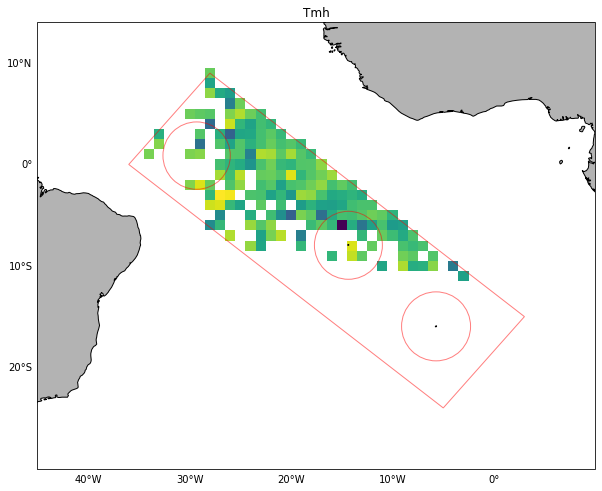

<Figure size 432x288 with 0 Axes>

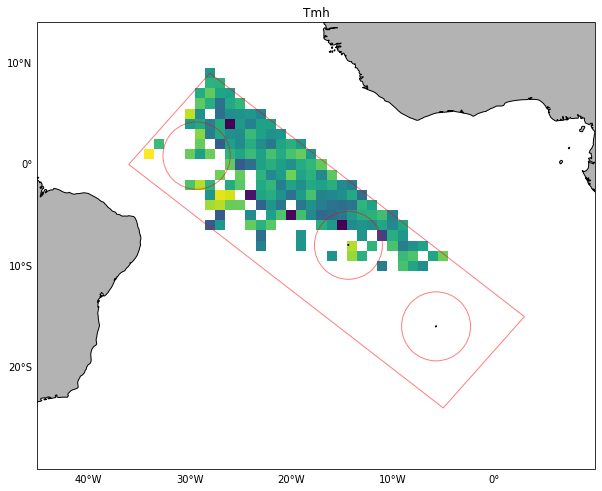

/tmp/ipykernel_17870/812578248.py:32: RuntimeWarning: divide by zero encountered in true_divide
  data3 = data1 / data2


<Figure size 432x288 with 0 Axes>

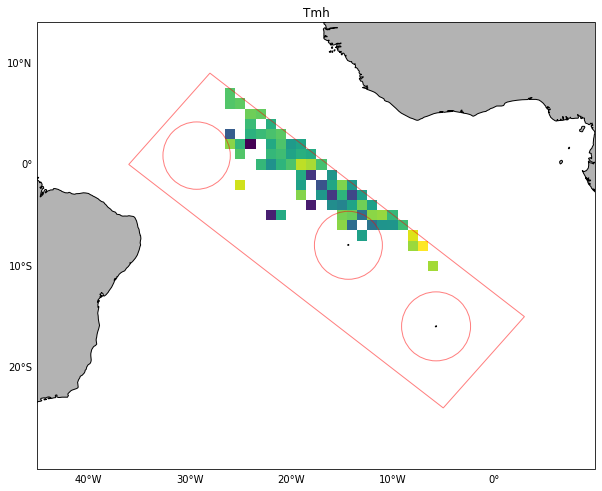

<Figure size 432x288 with 0 Axes>

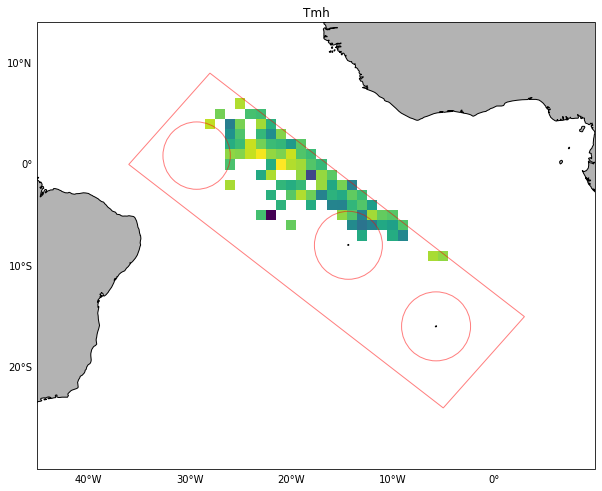

<Figure size 432x288 with 0 Axes>

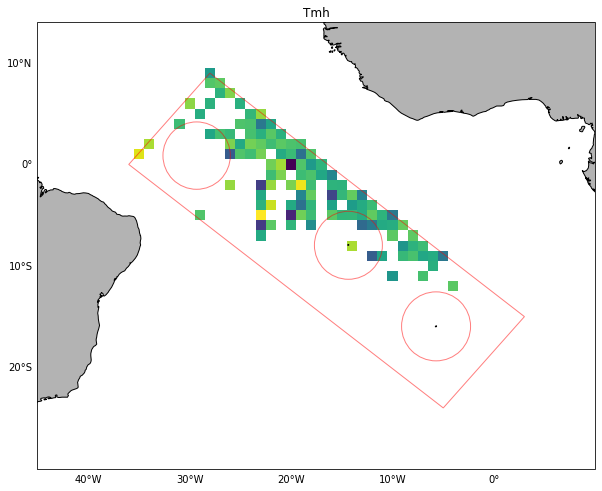

<Figure size 432x288 with 0 Axes>

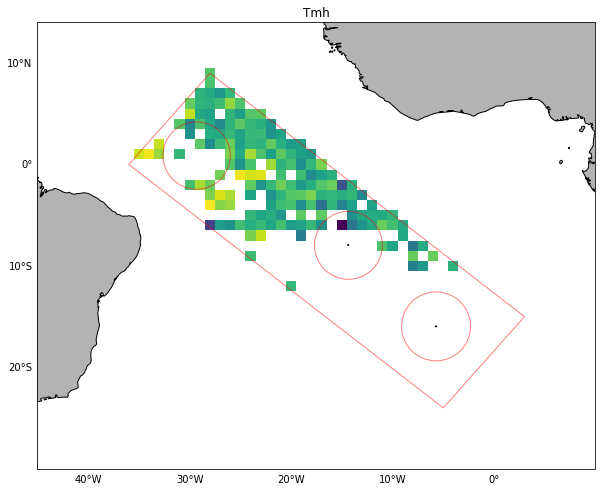

<Figure size 432x288 with 0 Axes>

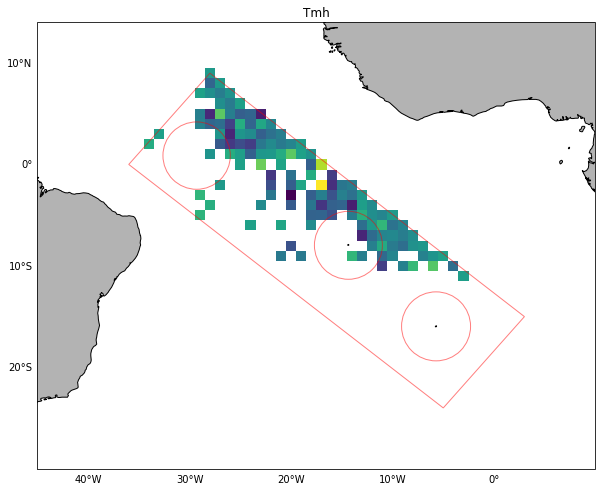

<Figure size 432x288 with 0 Axes>

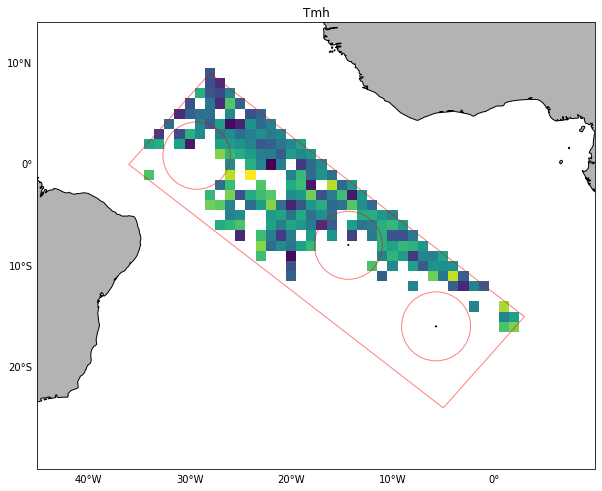

<Figure size 432x288 with 0 Axes>

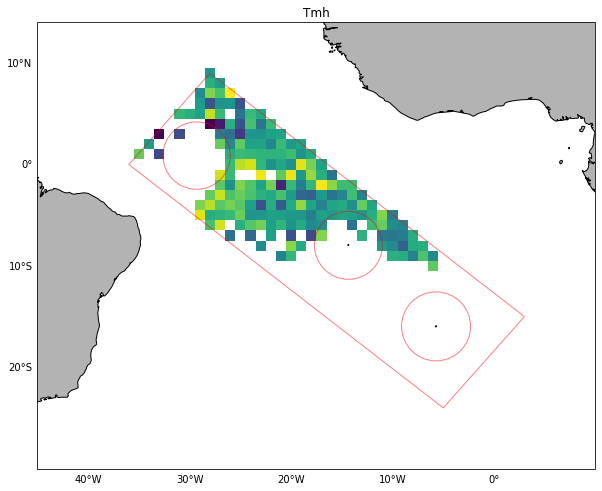

<Figure size 432x288 with 0 Axes>

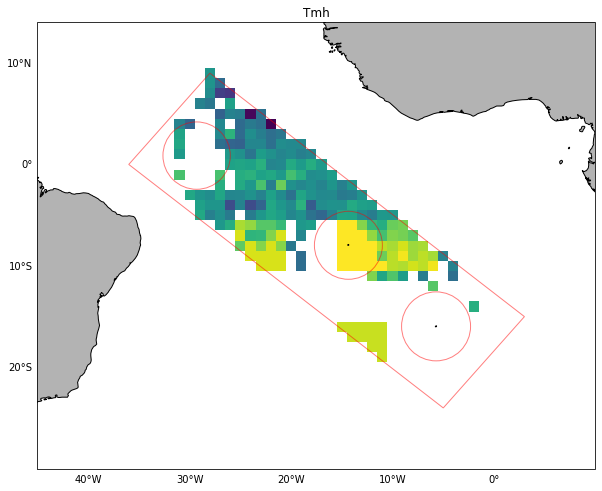

<Figure size 432x288 with 0 Axes>

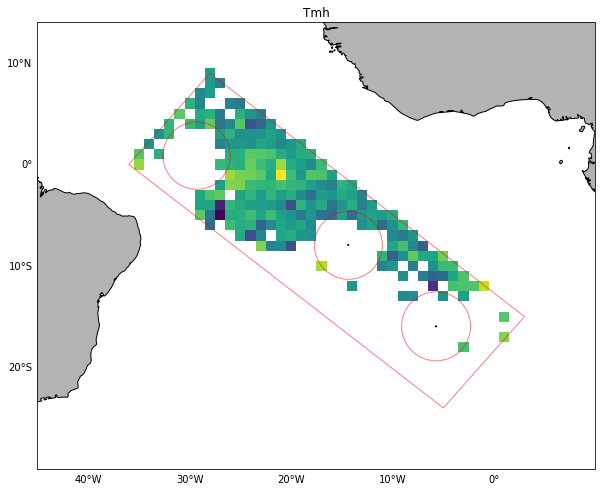

<Figure size 432x288 with 0 Axes>

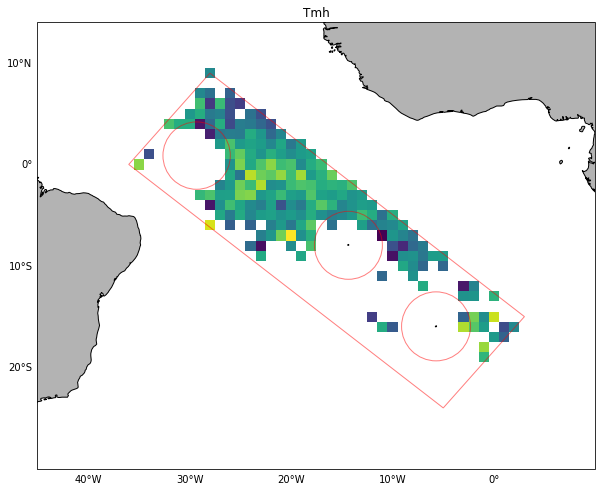

<Figure size 432x288 with 0 Axes>

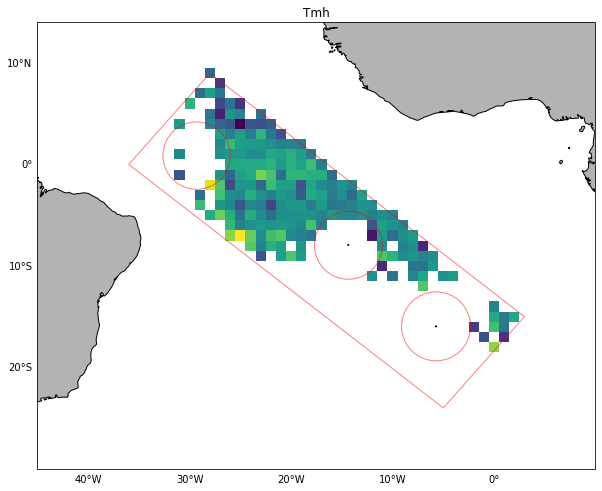

<Figure size 432x288 with 0 Axes>

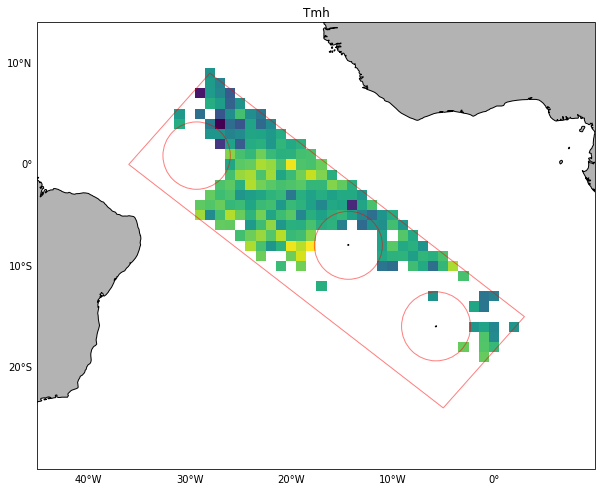

<Figure size 432x288 with 0 Axes>

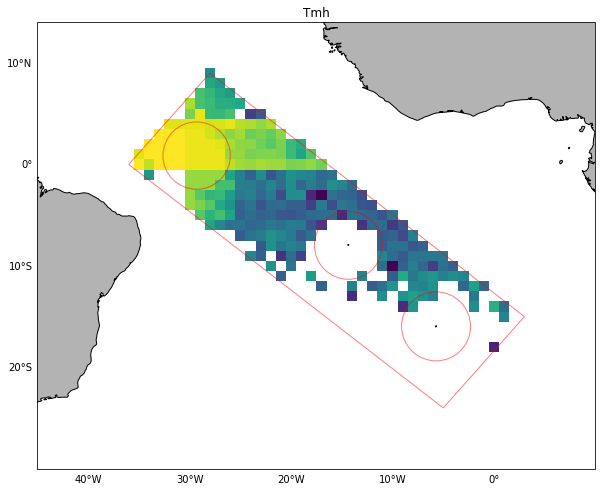

<Figure size 432x288 with 0 Axes>

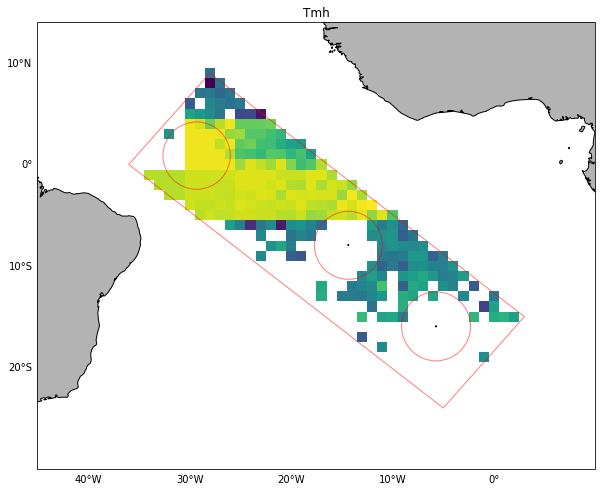

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

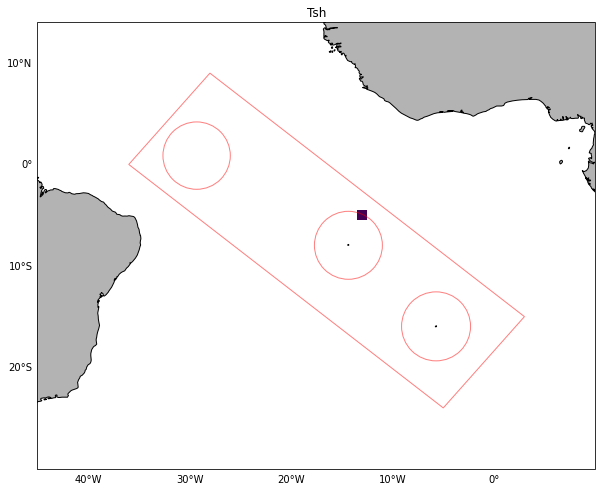

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: Invalid vmin or vmax

<Figure size 720x720 with 1 Axes>

<Figure size 432x288 with 0 Axes>

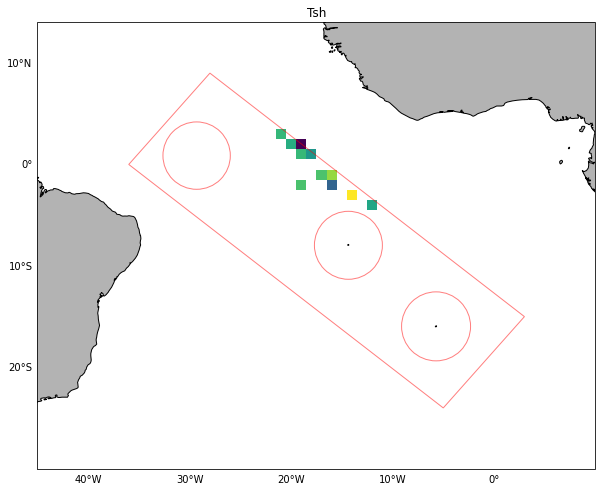

<Figure size 432x288 with 0 Axes>

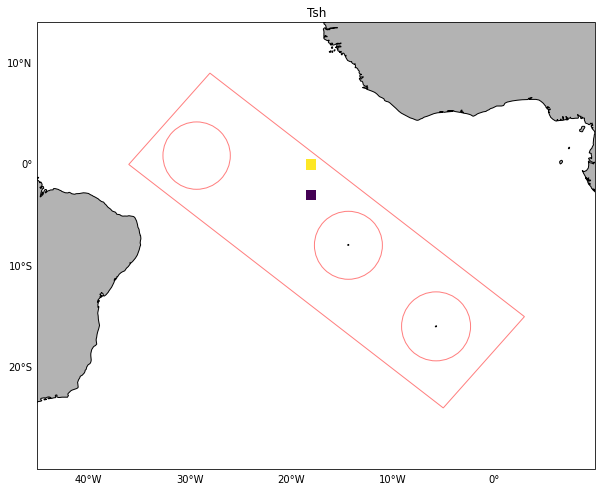

<Figure size 432x288 with 0 Axes>

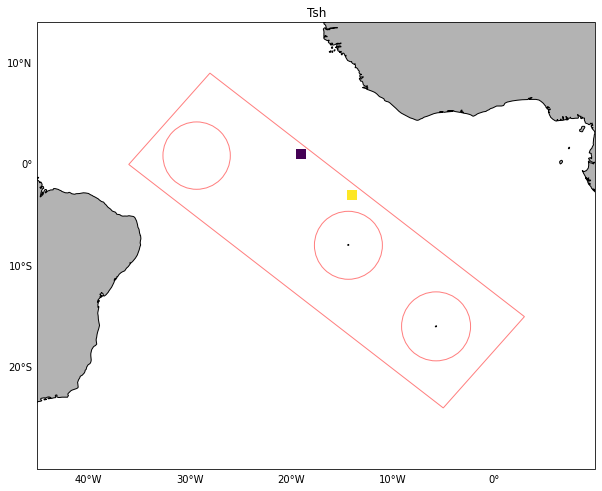

<Figure size 432x288 with 0 Axes>

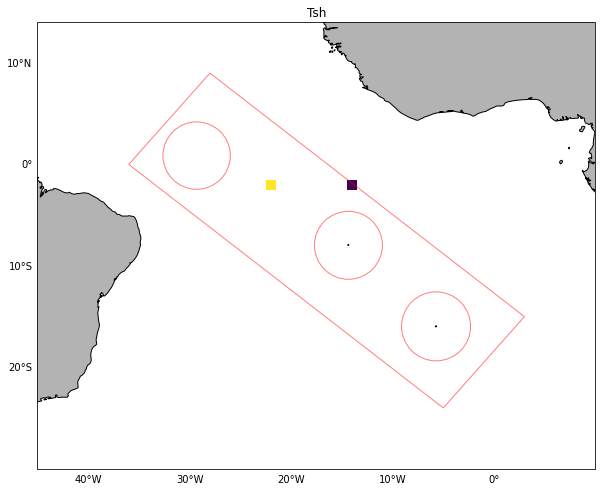

<Figure size 432x288 with 0 Axes>

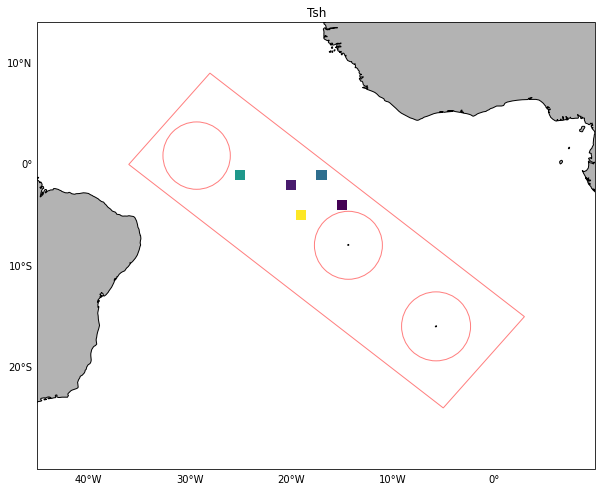

<Figure size 432x288 with 0 Axes>

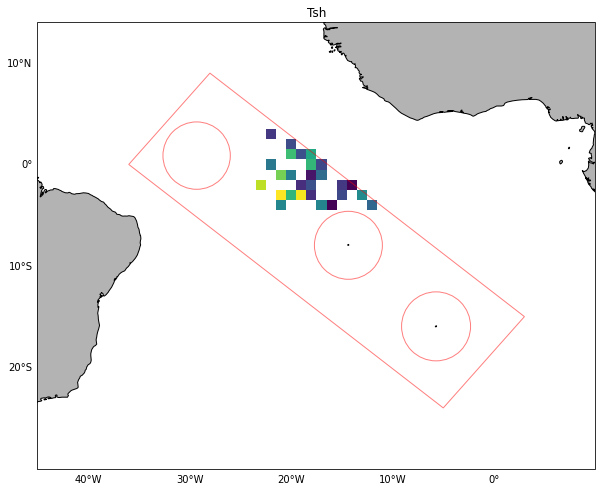

<Figure size 432x288 with 0 Axes>

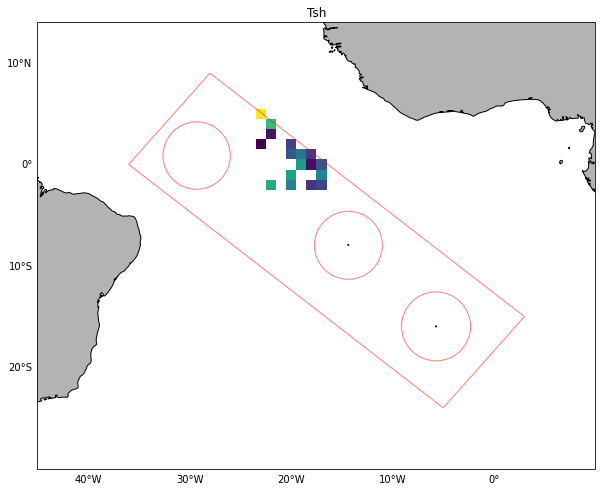

<Figure size 432x288 with 0 Axes>

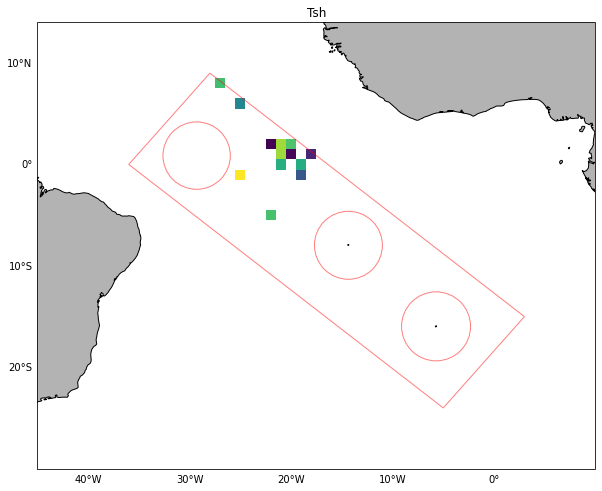

<Figure size 432x288 with 0 Axes>

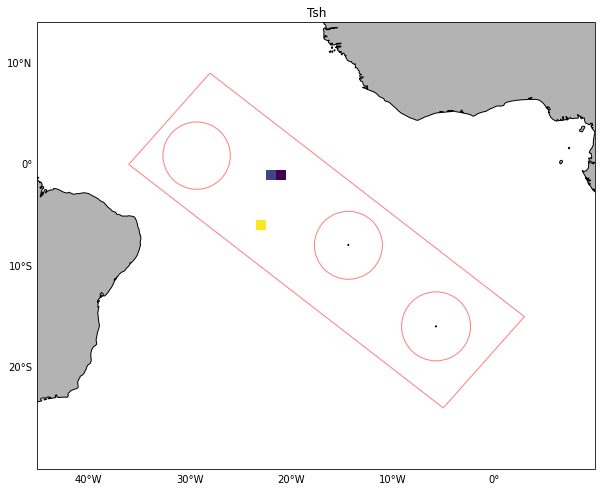

<Figure size 432x288 with 0 Axes>

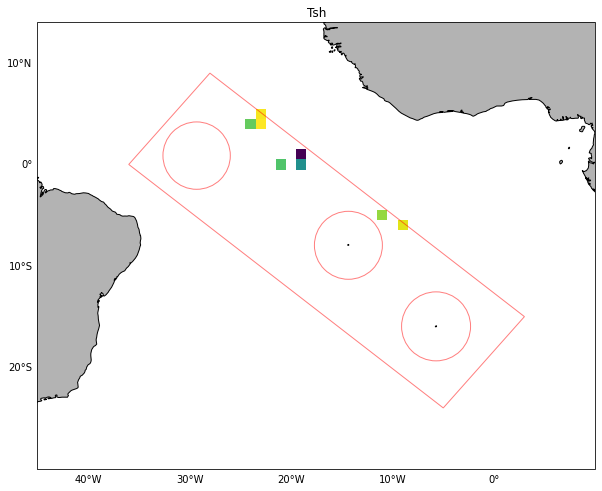

<Figure size 432x288 with 0 Axes>

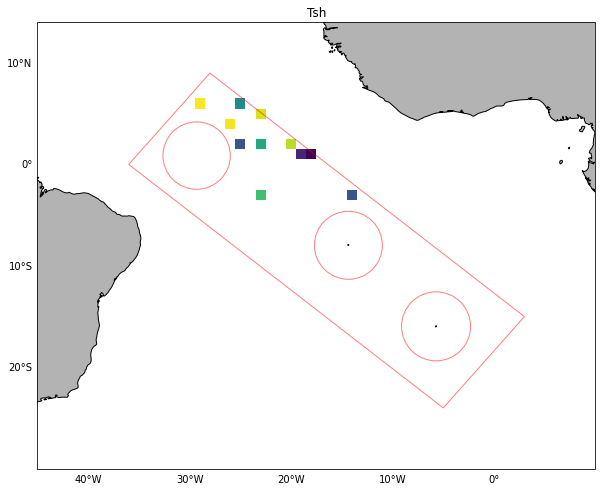

<Figure size 432x288 with 0 Axes>

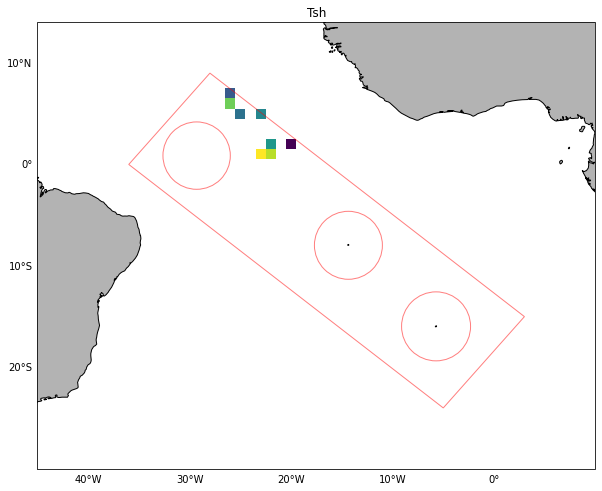

<Figure size 432x288 with 0 Axes>

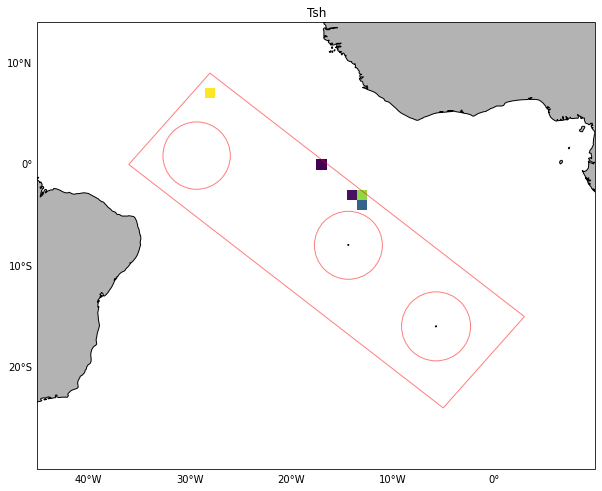

<Figure size 432x288 with 0 Axes>

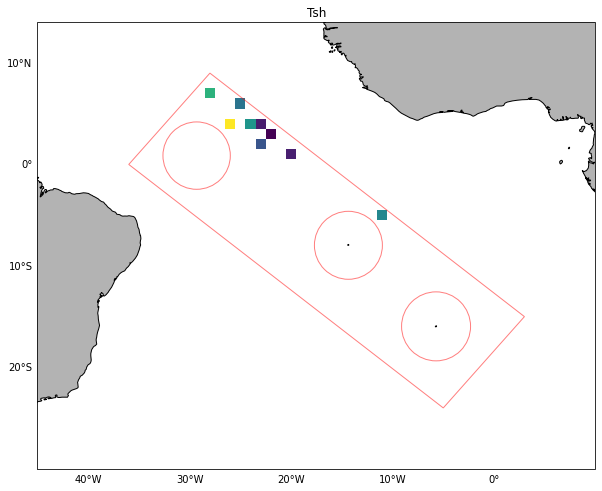

<Figure size 432x288 with 0 Axes>

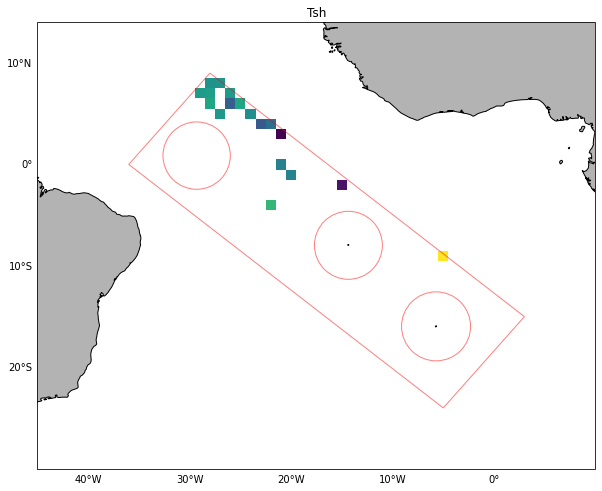

<Figure size 432x288 with 0 Axes>

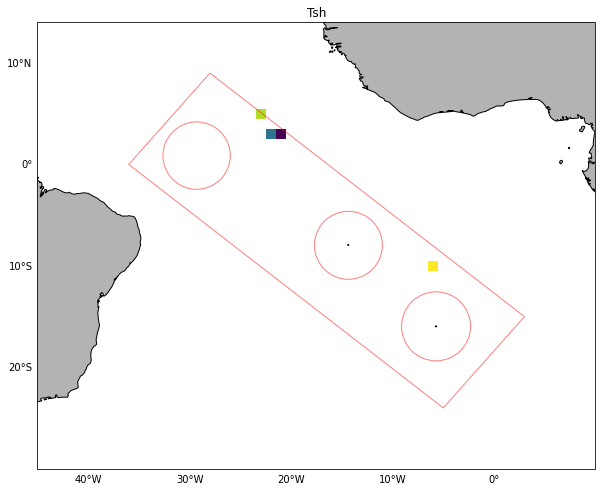

<Figure size 432x288 with 0 Axes>

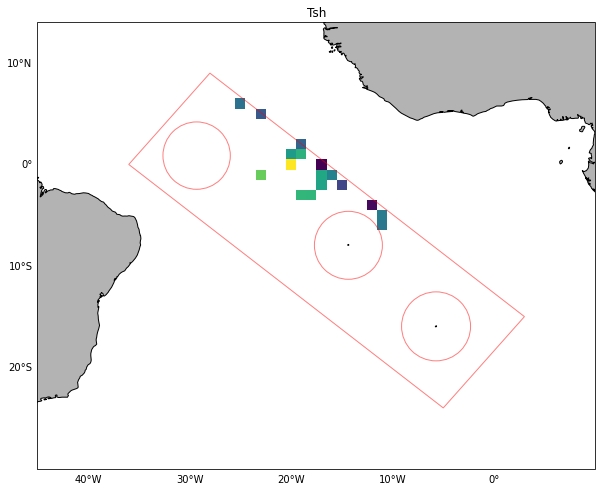

<Figure size 432x288 with 0 Axes>

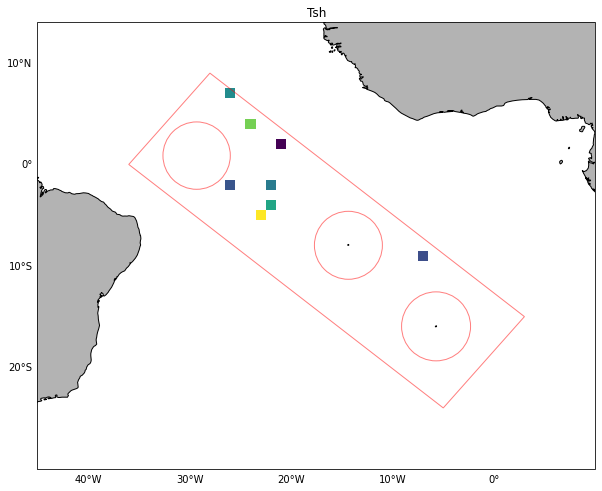

<Figure size 432x288 with 0 Axes>

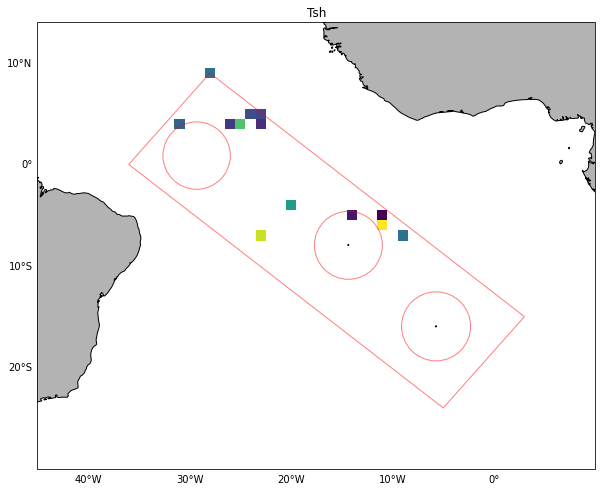

<Figure size 432x288 with 0 Axes>

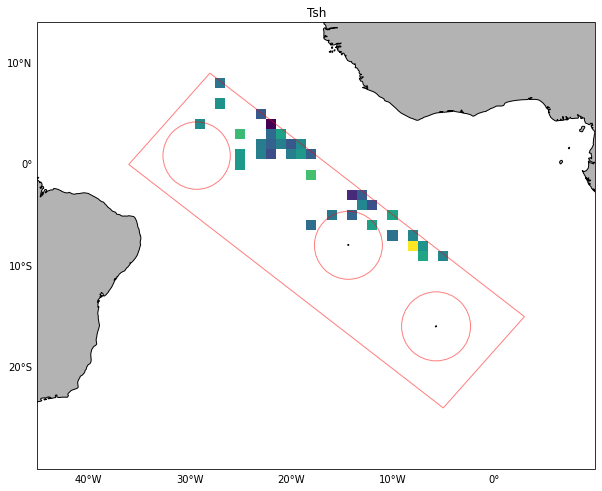

<Figure size 432x288 with 0 Axes>

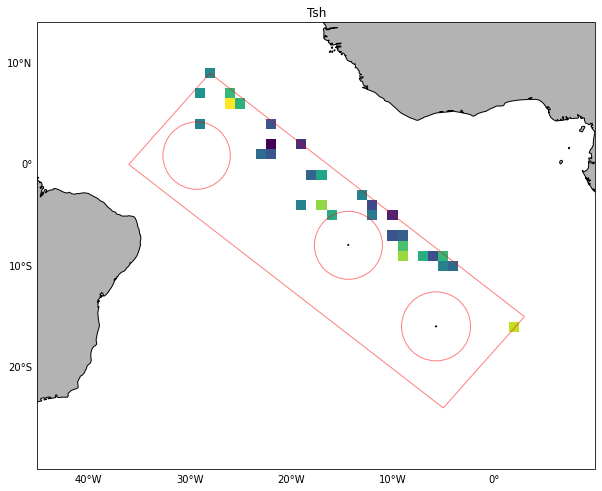

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [8]:
# Plot each year
def plota(data, tit):
    fig, ax = plt.subplots(1, 1, figsize=(10,10), subplot_kw=dict(projection=proj))
    gl = ax.gridlines(alpha=0, draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_extent([-45, 10, -30, 14], crs=proj)
    cm = ax.pcolormesh(Lon, Lat, data.T, norm=mcolors.LogNorm())
    ax.add_feature(LAND)
    patch_somar = mpatches.Polygon(somar_verts, ec='r', fc='None', alpha=.5)
    eez_spsp = mpatches.Circle([-29.31, 0.87], radius=3.32, ec='r', fc='None', alpha=.5)
    eez_ai = mpatches.Circle([-14.35, -7.97], radius=3.35, ec='r', fc='None', alpha=.5)
    eez_sh = mpatches.Circle([-5.71, -15.96], radius=3.4, ec='r', fc='None', alpha=.5)
    ax.add_patch(patch_somar)
    ax.add_patch(eez_spsp)
    ax.add_patch(eez_ai)
    ax.add_patch(eez_sh)
    ax.set_title(tit)
    #cb = plt.colorbar(cm, ax=ax, shrink=0.6)
    #cb.set_label('CPUE')
    plt.show()
    plt.clf()
    
cpues = np.empty((8, 64))
cpues_i = 0
    
for spp, eff, tit in [[cap_Tmh, eff_h, 'Tmh'], [cap_Tsh, eff_h, 'Tsh'], [cap_Toh, eff_h, 'Toh'], 
                      [cap_Tmk, eff_k, 'Tmk'], [cap_Tsk, eff_k, 'Tsk'], [cap_Tok, eff_k, 'Tok'], 
                      [cap_Smk, eff_k, 'Smk'], [cap_Sok, eff_k, 'Sok']]:
    for y in range(64):
        data1 = spp[y, :, :]
        data2 = eff[y, :, :]
        data3 = data1 / data2
        data1[data1==0] = np.nan
        data2[data2==0] = np.nan
        data3[data3==0] = np.nan
        data3[mask_somar] = np.nan
        plota(data3, tit)
        cpues[cpues_i, y] = np.nansum(data2)
        
    cpues_i += 1

In [ ]:
print(cpues)

In [ ]:
np.savetxt('2mar22_effs_wp5_sum.csv', cpues.T, delimiter=',')